In [2]:
import pandas as pd

df = pd.read_csv("/Users/kaiarupniak/Desktop/data-mining-project/heart_disease_health_indicators_BRFSS2015.csv")
print(df.shape)
print(df.columns)
df.head()


(253680, 22)
Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<Axes: >

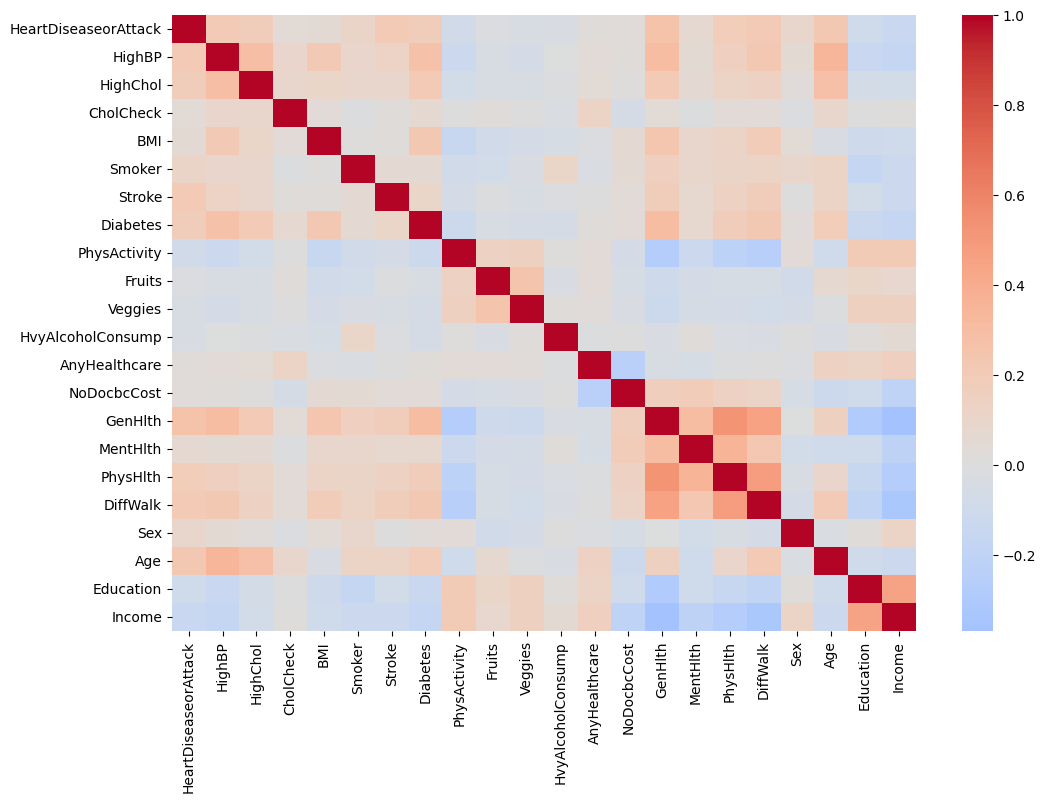

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)


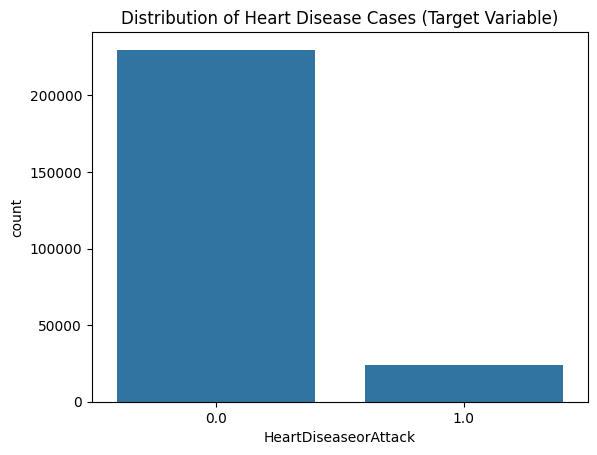

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.countplot(x='HeartDiseaseorAttack', data=df)
plt.title("Distribution of Heart Disease Cases (Target Variable)")
plt.show()


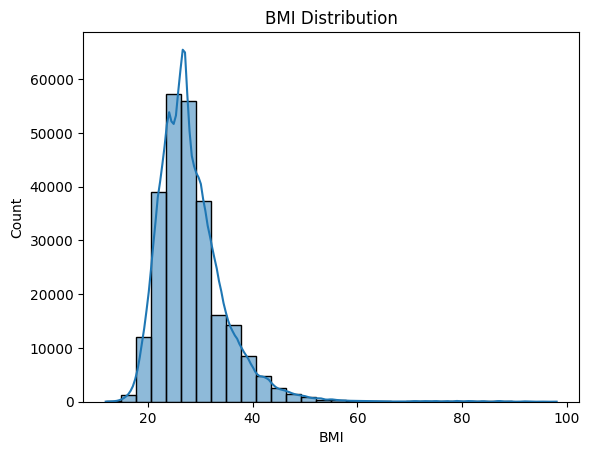

In [8]:
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title("BMI Distribution")
plt.show()


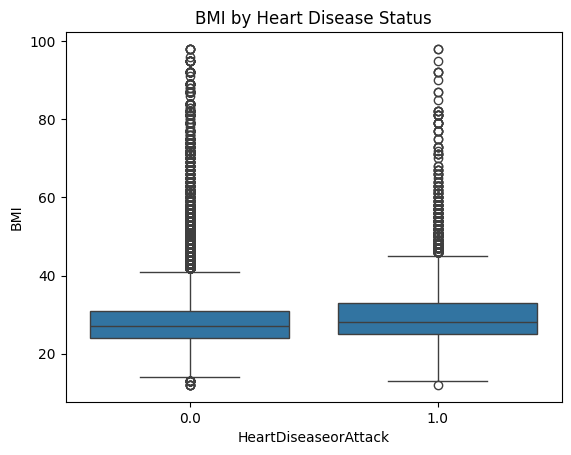

In [9]:
sns.boxplot(x='HeartDiseaseorAttack', y='BMI', data=df)
plt.title("BMI by Heart Disease Status")
plt.show()


/var/folders/_4/lw9kfy912msdrz1lnqwxr5c80000gn/T/ipykernel_35091/3977790885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)


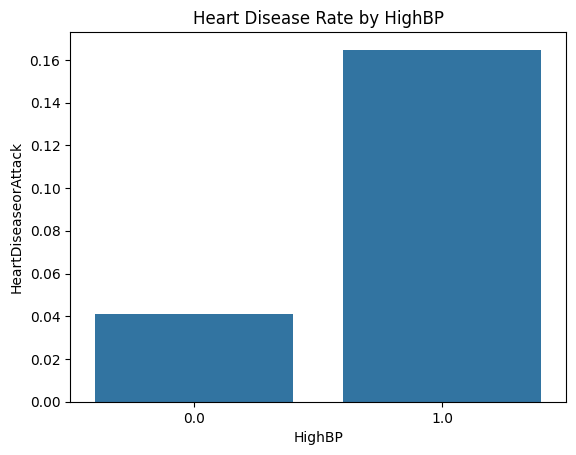

/var/folders/_4/lw9kfy912msdrz1lnqwxr5c80000gn/T/ipykernel_35091/3977790885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)


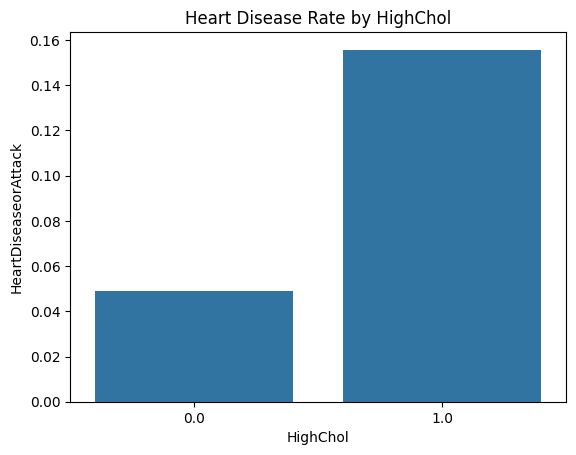

/var/folders/_4/lw9kfy912msdrz1lnqwxr5c80000gn/T/ipykernel_35091/3977790885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)


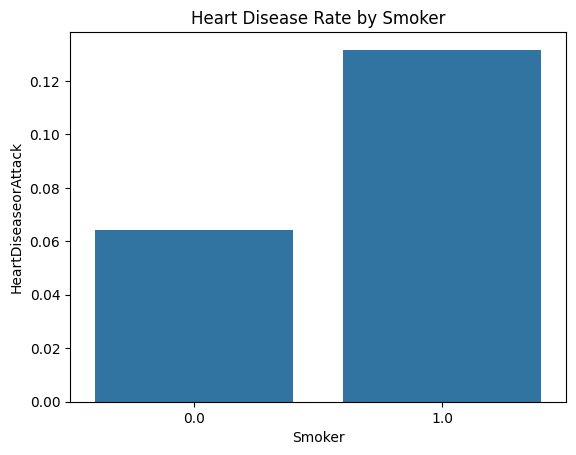

/var/folders/_4/lw9kfy912msdrz1lnqwxr5c80000gn/T/ipykernel_35091/3977790885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)


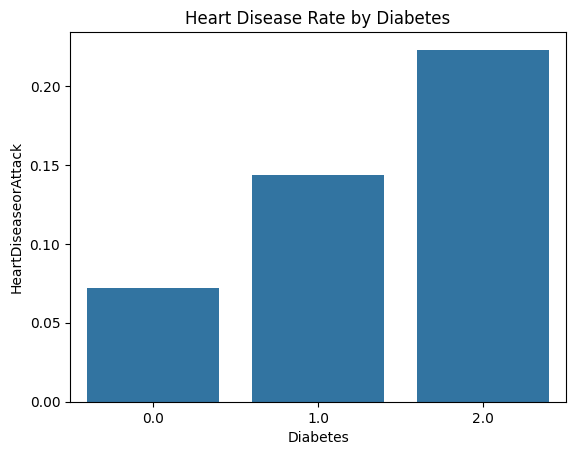

/var/folders/_4/lw9kfy912msdrz1lnqwxr5c80000gn/T/ipykernel_35091/3977790885.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)


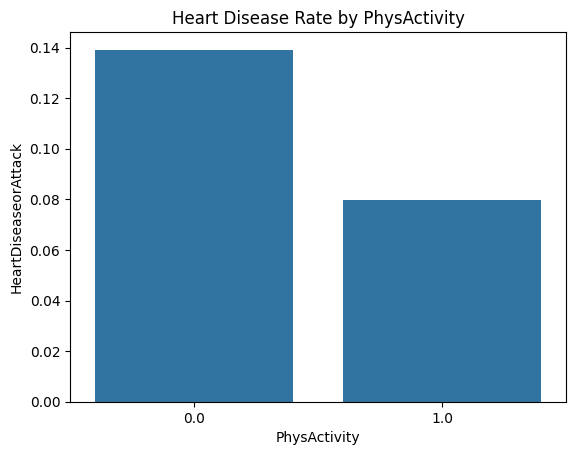

In [10]:
categorical_features = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'PhysActivity']

for col in categorical_features:
    sns.barplot(x=col, y='HeartDiseaseorAttack', data=df, ci=None)
    plt.title(f"Heart Disease Rate by {col}")
    plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df.drop("HeartDiseaseorAttack", axis=1)
y = df["HeartDiseaseorAttack"]

# standaryzacja
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [5]:
importance = pd.DataFrame({
    'feature': X.columns,
    'coef': logreg.coef_[0]
}).sort_values(by='coef', ascending=False)

print(importance.head(10))


      feature      coef
18        Age  0.773042
13    GenHlth  0.527587
17        Sex  0.381728
1    HighChol  0.304346
0      HighBP  0.262925
5      Stroke  0.195336
4      Smoker  0.190692
16   DiffWalk  0.107659
6    Diabetes  0.107441
2   CholCheck  0.099042


In [6]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     69007
         1.0       0.54      0.13      0.21      7097

    accuracy                           0.91     76104
   macro avg       0.73      0.56      0.58     76104
weighted avg       0.88      0.91      0.88     76104

ROC-AUC: 0.8455674117386858
